<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Compare-Case-Growth" data-toc-modified-id="Compare-Case-Growth-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Compare Case Growth</a></span></li></ul></div>

## Compare Case Growth
Show countries growth, relative to each other, per-capita. For a large country/continent such as America or China - sparse regoins will dilute the figure considerably compared to more dense areas, such as New York city.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('whitegrid')

country_list = ['United Kingdom', 'US', 'Italy', 'Spain', 'Germany', 'Sweden', 'Australia', 'Romania']

meta_df = pd.read_csv('../data/raw/country_meta.csv', index_col='country')
cty_dict = {}

for country in country_list:
    start_str = meta_df.loc[country, 'start_str']
    population = meta_df.loc[country, 'population']
    filepath = '../data/processed/'
    iata_2 = meta_df.loc[country, 'iata_2']
    filename = filepath+iata_2+'_df.csv'
    cty_df = pd.read_csv(filename, parse_dates=['Date'], index_col='Date')
    cty_dict[country] = cty_df.loc[start_str:, 'Actual'].dropna()/population

length = 0
for country, df in cty_dict.items():
    length = max(len(df), length)

empty = [np.nan] * length
empty_dict = {}
for country in country_list:
    empty_dict[country] = empty

temp_df = pd.DataFrame(empty_dict)
  
for col, vals in cty_dict.items():
    length = len(vals)
    col_pos = temp_df.columns.values.tolist().index(col)
    temp_df.iloc[:length, col_pos] = vals.values


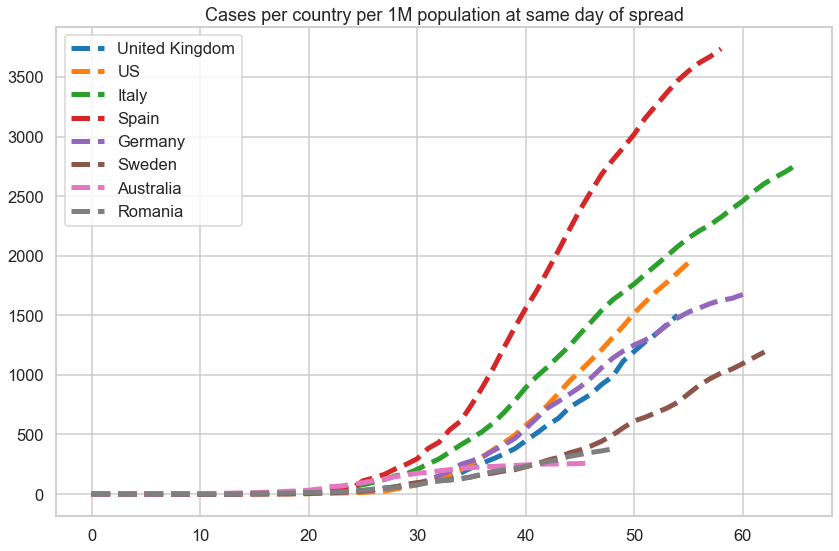

In [2]:
temp_df.plot(linestyle='--', linewidth=5, figsize=(12,8))
plt.title('Cases per country per 1M population at same day of spread')
#plt.yscale('log')
plt.tight_layout()
plt.show()

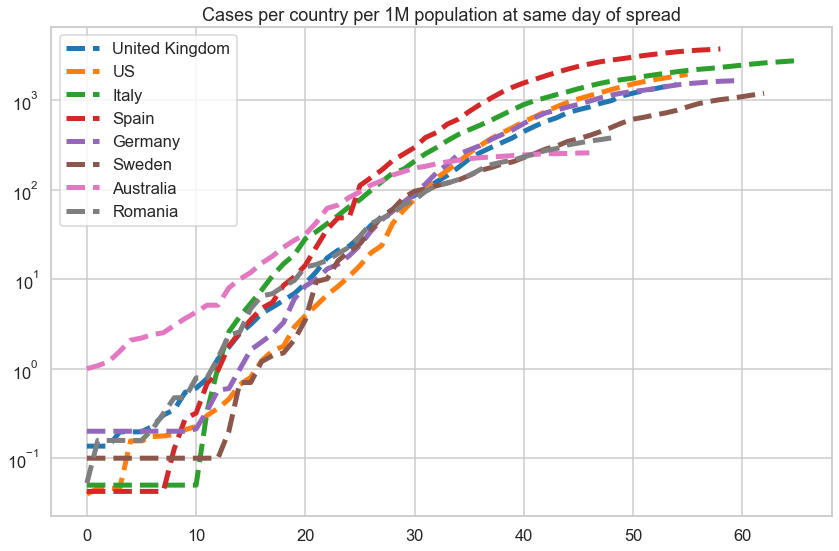

In [3]:
temp_df.plot(linestyle='--', linewidth=5, figsize=(12,8))
plt.title('Cases per country per 1M population at same day of spread')
plt.yscale('log')
plt.tight_layout()
plt.show()